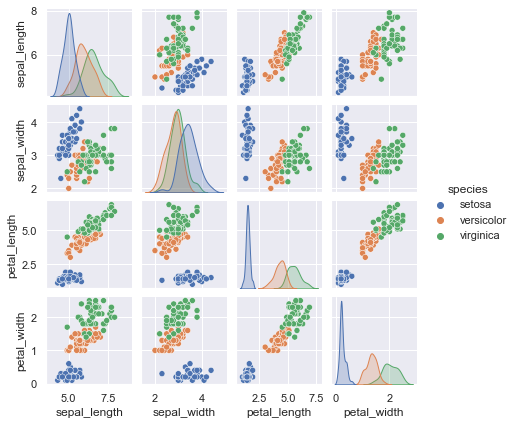

In [6]:
import seaborn as sns; # model 분석 결과
import matplotlib.pyplot as plt
sns.set()

iris = sns.load_dataset("iris")
iris.head()

sns.pairplot(iris, hue='species', height=1.5); # 상관계수도
X_iris = iris.iloc[:, :4] # 독립변수

from sklearn.decomposition import PCA

model = PCA(n_components = 2) # 주성분 2개까지
model.fit(X_iris) # 상관계수 행렬 -> 고유분해 -> 고유값과 고유벡터(2개선정)
# 변환행렬 4 X 2
X_2D = model.transform(X_iris) # 행렬결과 : 150 X 2 데이터로 변환

C:\Users\020\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


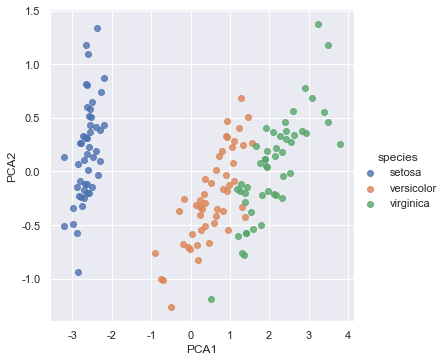

In [7]:
iris['PCA1'] = X_2D[:, 0] # 열추가 150 X 7
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);
plt.show()

In [8]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2


X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape : ', X.shape)

X.shape :  (60, 3)


In [9]:
import pandas as pd
df = pd.DataFrame(X, columns=['$X_1$', '$X_2$', '$X_3$'])
df.head(10)

,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


In [10]:
# 공분산행렬 만들기   (X1-X1mean) (X2-X2mean) (X3-X3mean)
#  000
#       0
#       0
#       0

X_cen = X - X.mean(axis=0)  # 행방향으로 -> 열평균을 계산 
X_cov = np.dot(X_cen.T, X_cen) / 59  # 전체개수 60개 => n-1 = 59
print(X_cov)  # 공분산행렬 출력

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [11]:
w,v = np.linalg.eig(X_cov)
print("고유값", w)
print("고유벡터", v)

고유값 [0.77830975 0.1351726  0.01034272]
고유벡터 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [12]:
w.sum()

0.9238250670727454

In [13]:
print("설명력 :", w/w.sum())

설명력 : [0.84248607 0.14631839 0.01119554]


In [14]:
# 비정방행렬에 대한 특이행렬분해 인데 여기서는 정방행렬에 사용
U, D, V_t = np.linalg.svd(X_cen)

In [15]:
D # 고유벡터의 절반만

array([6.77645005, 2.82403671, 0.78116597])

In [16]:
D ** 2 / np.sum(D**2)

array([0.84248607, 0.14631839, 0.01119554])

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [18]:
pca.singular_values_ # 고유값의 절반값

array([6.77645005, 2.82403671, 0.78116597])

In [19]:
pca.components_.T # 고유벡터와 동일한 값

array([[-0.93636116,  0.34027485, -0.08626012],
       [-0.29854881, -0.90119108, -0.31420255],
       [-0.18465208, -0.2684542 ,  0.94542898]])

In [20]:
pca.explained_variance_

array([0.77830975, 0.1351726 , 0.01034272])

In [21]:
pca.explained_variance_ratio_ # 설명력

array([0.84248607, 0.14631839, 0.01119554])

In [22]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# 60000 X 28 X 28
(train_x, train_y), (test_x, test_y) = mnist.load_data() # 784픽셀
train_x = train_x.reshape(-1, 28*28) # 전부 다
pca = PCA(n_components=0.95) # 설명력
X_reduced = pca.fit_transform(train_x)

In [23]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [24]:
print(pca.n_components_)

154


In [25]:
train_x.shape # 28 X 28 이미지 # 변환행렬 사이즈 784, 154

(60000, 784)

In [26]:
X_reduced.shape # 차원축소 -> 정직교하는 축으로

(60000, 154)

In [27]:
X_recovered = pca.inverse_transform(X_reduced) # 노이즈가 제거된 원래 이미지
X_recovered.shape

(60000, 784)

In [33]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    # 행계산 : // 몫나눗셈 + 나머지
    n_row = (len(instances) - 1) // images_per_row + 1
    row_images = [] # 초기화
    n_empty = n_row * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    
    for row in range(n_row):
        rimages = images[row * images_per_row : (row+1) *
                        images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off") # 축은 출력하지 말것

C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50517 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52629 missing from current font.
 

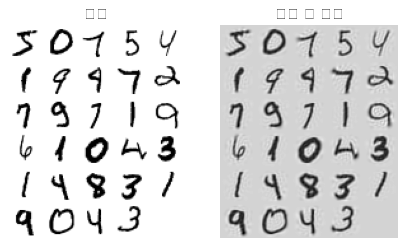

In [35]:
import matplotlib
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("원본", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축 후 복원", fontsize=16)
plot_digits(X_recovered[::2100])

In [37]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for batch_x in np.array_split(train_x, n_batches):
    print(",", end="")
    inc_pca.partial_fit(batch_x)
    
X_reduced = inc_pca.transform(train_x)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [38]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

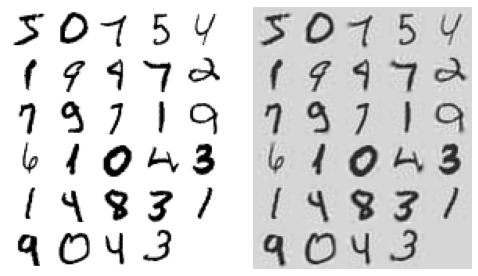

In [39]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [40]:
# PCA는 scale에 민감하다.
import mglearn
mglearn.plots.polt_scaling()

AttributeError: module 'mglearn.plots' has no attribute 'polt_scaling'

In [ ]:
from sklearn.datasets import load_breast_cancer
from skleran.model_selection import train_test_split
cancer = load_breast_can